# BEMM458J Final assignment

## You are a business analyst at the marketing department of Coca Cola. There is an increasing debate on social media in relation to the negative impact of plastic consumption on the environment.

## As of recently NGOs have started campaigning against Coca Cola and other multinationals. 

## General management needs you to conduct an analysis of recent conversations posted on Twitter for the purposes of determining the communication strategies followed by NGOs and how Coca Cola must engage on social media.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm
from statsmodels.stats import diagnostic as diag
import re
from wordcloud import WordCloud


import statsmodels.api as sm

In [37]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [38]:
pd.options.display.max_colwidth = 400

In [39]:


ConversationsLean=pd.read_csv('../data/ConversationsLean.csv')

In [40]:
ConversationsLean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   447 non-null    int64  
 1   tweet.created_at             447 non-null    object 
 2   tweet.id                     447 non-null    float64
 3   tweet.full_text              447 non-null    object 
 4   tweet.entities               447 non-null    object 
 5   tweet.user.id                447 non-null    int64  
 6   tweet.user.screen_name       447 non-null    object 
 7   tweet.user.followers_count   447 non-null    int64  
 8   tweet.user.friends_count     447 non-null    int64  
 9   tweet.user.favourites_count  447 non-null    int64  
 10  tweet.user.statuses_count    447 non-null    int64  
 11  tweet.retweet_count          447 non-null    float64
 12  tweet.favorite_count         447 non-null    float64
 13  tweet.favorited     

In [41]:
ConversationsLean.iloc[50]

Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                                                   4
tweet.created_at                                                                                                                                                                                                                                                                                                                                                                                                    2019-12-17 19:50:37.000000
tweet.id                                                                                                                                  

In [42]:
ConversationsLean.sample(3)

,Unnamed: 0,tweet.created_at,tweet.id,tweet.full_text,tweet.entities,tweet.user.id,tweet.user.screen_name,tweet.user.followers_count,tweet.user.friends_count,tweet.user.favourites_count,...,love,sadness,trust,identity_hate,insult,obscene,severe_toxic,threat,toxic,stakeholder
262,216,2016-07-01 19:32:04.000000,7.489624e+17,It's a perfect time to follow @PlasticFreeJuly and pledge to give up single use plastic this month! #ff #plasticfreejuly #joinus,"{'hashtags': [{'text': 'ff', 'indices': [100, 103]}, {'text': 'plasticfreejuly', 'indices': [104, 120]}, {'text': 'joinus', 'indices': [121, 128]}], 'symbols': [], 'user_mentions': [{'screen_name': 'PlasticFreeJuly', 'name': 'Plastic Free July', 'id': 1229187248, 'id_str': '1229187248', 'indices': [30, 46]}], 'urls': []}",541280211,Algalita,2865,696,1778,...,0.206475,0.081116,0.060406,0.002487,0.002733,0.002399,0.002370,0.002288,0.003948,Scientific
78,32,2019-04-16 18:20:04.000000,1.118218e+18,"@Nestle sells billions of products a day, and 98% of them are packaged in single-use plastic. Join us TODAY as we flood their customer service line with demands to phase out single-use plastic. Call 1-888-918-6672 today! #plasticpollutes #breakfreefromplastic @Greenpeace https://t.co/kXdVWJPaCV","{'hashtags': [{'text': 'plasticpollutes', 'indices': [221, 237]}, {'text': 'breakfreefromplastic', 'indices': [238, 259]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Nestle', 'name': 'Nestlé', 'id': 23085995, 'id_str': '23085995', 'indices': [0, 7]}, {'screen_name': 'Greenpeace', 'name': 'Greenpeace', 'id': 3459051, 'id_str': '3459051', 'indices': [260, 271]}], 'urls': [], 'media': [{'...",71310291,PlasticPollutes,45953,6595,13453,...,0.047251,0.236590,0.049324,0.002232,0.003017,0.002697,0.002305,0.002256,0.004379,NGO
313,2,2019-08-28 11:43:01.000000,1.166678e+18,Funding available for projects collecting &amp; recycling non-household business waste https://t.co/PR7bBefCyX #recycling #circulareconomy #funding https://t.co/RgKMFCch1i,"{'hashtags': [{'text': 'recycling', 'indices': [113, 123]}, {'text': 'circulareconomy', 'indices': [124, 140]}, {'text': 'funding', 'indices': [141, 149]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/PR7bBefCyX', 'expanded_url': 'https://bit.ly/2YcFhPF', 'display_url': 'bit.ly/2YcFhPF', 'indices': [89, 112]}], 'media': [{'id': 1166677560996052999, 'id_str': '11666775609...",172694825,WRAP_UK,31772,1901,1963,...,0.010775,0.396400,0.020948,0.002373,0.003016,0.002851,0.001867,0.001833,0.006686,OtherInstitution


In [43]:
ConversationsLean.groupby('stakeholder').count()

,Unnamed: 0,tweet.created_at,tweet.id,tweet.full_text,tweet.entities,tweet.user.id,tweet.user.screen_name,tweet.user.followers_count,tweet.user.friends_count,tweet.user.favourites_count,...,joy,love,sadness,trust,identity_hate,insult,obscene,severe_toxic,threat,toxic
stakeholder,,,,,,,,,,,,,,,,,,,,,
Artist,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
Multinational,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
NGO,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,241
OtherInstitution,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
Scientific,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24


## Task 1. Which Twitter users are the most popular ? (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: consider retweet and favorite counts as proxies for popularity

<h1><span style="color: #008000;"><strong>1a. Top 5 most popular users by number of Retweets.</strong></span></h1>

In [44]:
#Group by the user name the sum of the retweet counts
ret=ConversationsLean.groupby(['tweet.user.screen_name']).sum()[['tweet.retweet_count']]
ret.columns = ['Retweets']
ret.index.names = ['User']
#Sort values by retweets
ret_sorted=ret.sort_values(by='Retweets',ascending=False)
ret_sorted.head(1000)

,Retweets
User,
PlasticPollutes,4242.0
Greenpeace,3941.0
5gyres,569.0
Algalita,540.0
WRAP_UK,474.0
NoPlasticStraws,453.0
Nestle,228.0
PlasticfreeBeth,147.0
Unilever,111.0


In [45]:
#Create adataframe with top 5 users  by number of Retweets
ret_sorted_5= ret_sorted[:5]
ret_sorted_5
#Create a dataframe with the rest of users
ret_others_df= ret_sorted[5:]
#Sum all the Retweets other than the top 5
Other_retweets=ret_others_df['Retweets'].sum()
#Create a new row with the sum of all the Retweets other than the top 5
new_row = pd.DataFrame(data = {'Retweets' : [Other_retweets]},index=['Others'])
#Create a new dataframe with the top 5 users  by number of Retweets and the rest of users**
ret_final = pd.concat([ret_sorted_5, new_row])
ret_final.index.names = ['User']
ret_final

,Retweets
User,
PlasticPollutes,4242.0
Greenpeace,3941.0
5gyres,569.0
Algalita,540.0
WRAP_UK,474.0
Others,1489.0


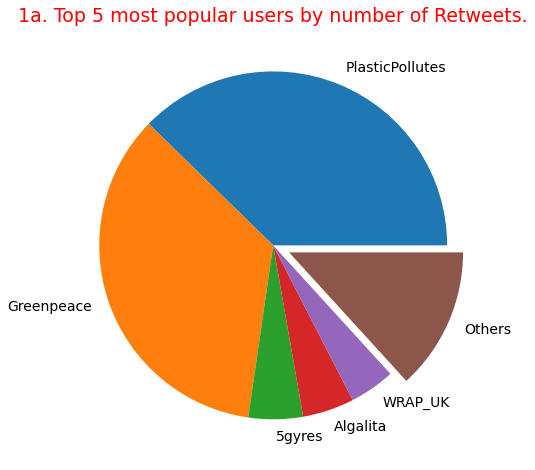

In [46]:
#Plot Top 5 most popular users by number of Retweets.
myexplode = [0, 0, 0, 0,0,.1]
ret_final.plot.pie(subplots=True, figsize=(16, 8), explode = myexplode,legend=None, fontsize=14)
plt.title('1a. Top 5 most popular users by number of Retweets.', fontsize=19,  color='red')
plt.ylabel(None)
plt.show()

<h3><span style="color: #008000;">We can observe that PlasticPollutes followed by Greenpeace are the two users that has more Retweets, these users will be considered the mot popular users, followed by 5gyres, algalita and Wrap_UK.</span></h3>
<br>

<h1><span style="color: #008000;"><strong>1b. Top 5 most popular users by number of Favourites.</strong></span></h1>

In [47]:
#Group by the user name the sum of the Favourites given counts
ret2=ConversationsLean.groupby(['tweet.user.screen_name']).sum()[['tweet.favorite_count']]
ret2.columns = ['Favourites']
ret2.index.names = ['User']
#Sort values by retweets
ret_sorted2=ret2.sort_values(by='Favourites',ascending=False)
ret_sorted2.head(100)

,Favourites
User,
Greenpeace,6357.0
PlasticPollutes,4027.0
Nestle,688.0
5gyres,636.0
WRAP_UK,625.0
Unilever,215.0
PepsiCo,154.0
NoPlasticStraws,117.0
PlasticfreeBeth,92.0


In [48]:
#Create adataframe with top 5 users  by number of Favourites given
ret_sorted_5_2= ret_sorted2[:5]
#Create a dataframe with the rest of users
ret_others_df2= ret_sorted2[5:]
#Sum all the Favourites other than the top 5
Other_retweets2=ret_others_df2['Favourites'].sum()
#Create a new row with the sum of all the Favourites other than the top 5
new_row2 = pd.DataFrame(data = {'Favourites' : [Other_retweets]},index=['Others'])
#Create a new dataframe with the top 5 users  by number of Favourites and the rest of users**
ret_final2 = pd.concat([ret_sorted_5_2, new_row2])
ret_final2.index.names = ['User']
ret_final2

,Favourites
User,
Greenpeace,6357.0
PlasticPollutes,4027.0
Nestle,688.0
5gyres,636.0
WRAP_UK,625.0
Others,1489.0


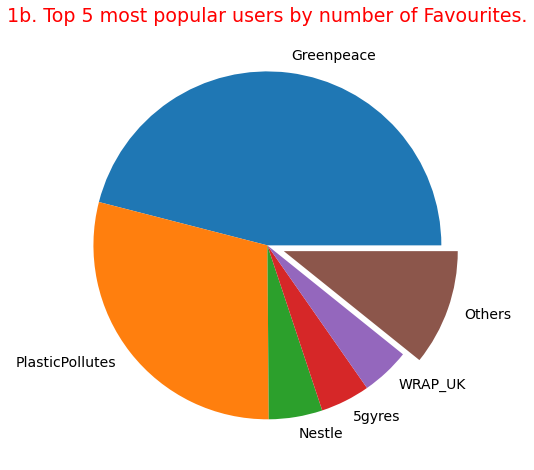

In [49]:
#Plot Top 5 most popular users by number of Favourites.
myexplode = [0, 0, 0, 0,0,.1]
ret_final2.plot.pie(subplots=True, figsize=(16, 8), explode = myexplode,legend=None, fontsize=14)
plt.title('1b. Top 5 most popular users by number of Favourites.', fontsize=19,  color='red')
plt.ylabel(None)
plt.show()

<h3><span style="color: #008000;">We can observe again that Greenpeace  followed by PlasticPollutes are the two users that has more Favourites(likes), these users will be considered the mot popular users, followed by Nestle, 5gyres, and Wrap_UK.</span></h3>
<br>

<h1><span style="color: #008000;"><strong>1c. Calculating the weighted linear combination of retweets and favourite counts  (50% -50%)</strong></span></h1>

<h3><span style="color: #008000;"> In order to have one list of popularity we can build a model of weighted linear combination of retweets and favourite counts.In this case, we gave equal weight to each element, but the marketing department staff can add some specific weights.<br>
    
This calculation is achieved by normalizing both columns (forcing them to sum one); then calculte the sum of the columns multiplied by the chosen weight. 
    
</span></h3>
<br>


In [50]:
# Sum all the values for the coulumns retweet and favorite
sumfav=task1[['tweet.user.favourites_count']].sum()
sumret=task1[['tweet.retweet_count']].sum()
# Normalise each column dividing them by its sum
retweet_norm=task1['tweet.retweet_count'].apply(lambda x: x/sumret)
fav_norm=task1['tweet.user.favourites_count'].apply(lambda x: x/sumfav)
# Merge the columns into a new dataframe
df_merge_col = pd.merge(fav_norm, retweet_norm, on='tweet.user.screen_name')
#Calculate the weighted linear combination  of retweets and favourite counts (50%-50%)
df_merge_col['weighted_col']=df_merge_col['tweet.user.favourites_count']*.5+df_merge_col['tweet.retweet_count']*.5
#Sort the values
df_merge_col.sort_values(by='weighted_col',ascending=False).head(10)['weighted_col']


NameError: name 'task1' is not defined

<h3><span style="color: #008000;"> As in 1a and ib we can conclude that  PlasticPollutes followed by Greenpeace are the most popular users taking in consideration the retweets made and favourites count, these companies together almost acomplish 3/4 of the total counts, followed by other well-known NGOs.</span></h3>
<br>

## Task 2. Which Stakeholders users are the most emotional ? (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: visualize levels of emotions accross stakeholders (NGOs, artists, Multinational)

In [ ]:
# Group by stakeholders
task2=ConversationsLean.groupby(['stakeholder']).mean()[['anger','fear','joy','love','sadness','trust','identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']]
task2

In [ ]:
# Plot emotions across Stakeholders
task2.plot(figsize=(15,10))
plt.title('Stakeholders Sentiments', fontsize=19,  color='red')
plt.xlabel('Stakeholders', fontsize=15, color='darkblue')
plt.ylabel('Values', fontsize=15, color='darkblue')
plt.show()

<h3><span style="color: #008000;">It can be concluded that non-governmental organizations have the strongest reactions towards negative emotions such as anger, sadness and fear; artists react more to positive emotions such as love and joy. It is worth mentioning that scientists pparentely respond in a more balanced way between negative and positive emotions.</span></h3>
<br>

## Task 3. Do emotions play a role in the number of retweets and favorites achieved by tweets ? (20 %)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip:  correlations between variables
### Tip:  visualizations relating variables
### Tip:  optionally consider basic regression models to determine the impact of some variables on others (e.g. impact of love on favorite, impact of fear on retweet)

<h2><span style="color: #008000;"><strong>3a. Create a dataframe with the required data</strong></span></h2>

In [ ]:
task3=ConversationsLean.groupby(['tweet.retweet_count','tweet.user.favourites_count']).mean()[['anger','fear','joy','love','sadness','trust','identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']].reset_index()
task3.columns = ['retweet', 'favourites','anger','fear','joy','love','sadness','trust','id_hate', 'insult', 'obscene', 'sevtoxic', 'threat', 'toxic']
task3=task3.astype(float)
task3.sample(6)

<h2><span style="color: #008000;"><strong>3b. Check for Perfect Multicollinearity</strong></span></h2>

In [ ]:
# calculate the correlation matrix  between variables
task3_a=task3.drop(['retweet','favourites'], axis = 1)
corr=task3_a.corr()
display(corr)
#Plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [ ]:
#Plot the bivariate relationships between combinations of variables
pd.plotting.scatter_matrix(task3_a, alpha = 1, figsize = (14,9))
plt.show()

<h3><span style="color: #008000;">We can observe  variables that are highly linearly related, we will drop that variables so the coefficients in our regression model are not artificially calculated. </span></h3>
<br>

In [ ]:
# Eliminate the variables that are highly correlated
task3_drop = task3_a.drop(['id_hate','insult','threat','obscene',  'joy',  'fear'], axis = 1)


In [ ]:
# calculate the correlation matrix  between variables
corr2=task3_drop.corr()
display(corr2)
#Plot correlation
sns.heatmap(corr2, xticklabels=corr2.columns, yticklabels=corr2.columns, cmap='RdBu')

In [ ]:
#Plot the bivariate relationships between combinations of variables
pd.plotting.scatter_matrix(task3_drop, alpha = 1, figsize = (14,9))
plt.show()

<h3><span style="color: #008000;">Now we have the variables that are going to initially use our regression model. After that we will  determine the level of importance of each predictor variable and eliminate the variables that are not significant to our regression model.</span></h3>
<br>

<h2><span style="color: #008000;"><strong>3c. Regression Model of retweets on emotions.</strong></span></h2>

In [ ]:
#Final Regression Model of Retweets on significant variables
X = task3[['joy', 'id_hate','insult','obscene']]
Y = task3['retweet']
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

<h2><span style="color: #008000;"><strong>3d. Regression Model of favourites on emotions.</strong></span></h2>

In [ ]:
#Final Regression Model of favourites on significant variables
X1 = task3[['toxic','joy','insult','sevtoxic']]
Y1 = task3['favourites']
model1 = sm.OLS(Y1, X1).fit()
print_model1 = model1.summary()
print(print_model1)

<h3><span style="color: #008000;">We can conclude that emotions play an essential role in the number of retweets sent and the number of favourites (likes). <br>
It is important to note that emotional influence is more significant in favourites counts, which we can observe in the adjusted square R is .557. We also note that negative emotions have a greater impact than positive emotions.</span></h3>
<br>

## Task 4. Develop and apply a function which: (1) extracts ALL the hashtags from the column 'tweet.full_text', (2) saves the result as a new column (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: consider lambda functions applied to a dataframe

### Tip: refer to the module labs for examples on how to use REGEX in the context of pandas dataframes

In [ ]:
# Use a lambda function and REGEX to search patterns that contains the hashtags inthe column tweet.full_text
ConversationsLean['hashtags_extracted']=ConversationsLean['tweet.full_text'].apply(lambda x:re.findall(r'\B(\#[a-zA-Z]+\b)(?!;)', x))

In [ ]:
ConversationsLean['hashtags_extracted'].head(15)

<h3><span style="color: #008000;">We can clearly observe the hashtags used to get the attention of twitter users. These hashtags are manly about plastic, the pollution it creates, sustainability and recycling. </span></h3>
<br>

## Task 5. what are the differences between stakeholders ?   (30%)

### Tip: explore differences in terms of emotions, popularity, hashtags used, number of tweets,etc

<h1><span style="color: #008000;"><strong>5a. Differences in emotions across stakeholders.</strong></span></h1>


<h3><span style="color: #008000;"> As we already study emotions across stakeholders in Task 2, we will study negative and positive emotions across stakeholders. </span></h3>
<br>

<h2><span style="color: #008000;"> 5ai. Create a DataFrame of emotions across stakeholders. </span></h2>
<br>

In [ ]:
# Create a Dataframe with  emotions
emo=ConversationsLean.groupby(['stakeholder']).mean()[['anger','fear','joy','love','sadness','trust','identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']]
emo

<h2><span style="color: #008000;"> 5aii. For a better visualisation we will normalise each column by diving it by its sum; then we will average all the  positive feelings and all the negative feelings.  </span></h2>
<br>

In [ ]:
# Sum all the values for each coulumns
sumjoy=emo[['joy']].sum();sumlove=emo[['love']].sum(); sumtrust=emo[['trust']].sum();
sumanger=emo[['anger']].sum();sumfear=emo[['fear']].sum();sumsadness=emo[['sadness']].sum(); sumidentity_hate=emo[['identity_hate']].sum();
suminsult=emo[['insult']].sum();sumobscene=emo[['obscene']].sum(); sumsevere_toxic=emo[['severe_toxic']].sum();
sumthreat=emo[['threat']].sum();sumtoxic=emo[['toxic']].sum()


In [ ]:
# Normalise each column dividing them by its sum
joy_n=emo['joy'].apply(lambda x: x/sumjoy);love_n=emo['love'].apply(lambda x: x/sumlove);trust_n=emo['trust'].apply(lambda x: x/sumtrust);
anger_n=emo['anger'].apply(lambda x: x/sumanger);fear_n=emo['fear'].apply(lambda x: x/sumfear);sadness_n=emo['sadness'].apply(lambda x: x/sumsadness);
identity_hate_n=emo['identity_hate'].apply(lambda x: x/sumidentity_hate);insult_n=emo['insult'].apply(lambda x: x/suminsult);
obscene_n=emo['obscene'].apply(lambda x: x/sumobscene);severe_toxic_n=emo['severe_toxic'].apply(lambda x: x/sumsevere_toxic);
threat_n=emo['threat'].apply(lambda x: x/sumthreat);toxic_n=emo['toxic'].apply(lambda x: x/sumtoxic)

In [ ]:
# Merge all the normalised emotions into a  single dataframe
from functools import reduce
df_emo = [joy_n, love_n,trust_n,anger_n,fear_n,sadness_n,identity_hate_n,insult_n,obscene_n,severe_toxic_n,threat_n,toxic_n]
emo_n = reduce(lambda  left,right: pd.merge(left,right,on=['stakeholder'], how='outer'), df_emo)
emo_n

In [ ]:
#Average of all positive normalised emotions, and average of all negative normalised emotions; add the averages to the dataframe
emo_n['positive_emotions']=(emo_n['joy']+emo_n['love']+emo_n['trust'])/3
emo_n['negative_emotions']=(emo_n['anger']+emo_n['fear']+emo_n['sadness']+emo_n['identity_hate']+emo_n['insult']+emo_n['obscene']+emo_n['severe_toxic']+emo_n['threat']+emo_n['toxic'])/9
emo_n

In [ ]:
# Drop all unnecesary columns
emo_final=emo_n.drop(['anger','fear','joy','love','sadness','trust','identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic'], axis = 1)
emo_final

<h2><span style="color: #008000;"> 5aiii. Plot positive and the negative feelings accross stakeholders.  </span></h2>
<br>

In [ ]:
# Plot negative and positive emotions across Stakeholders
emo_final.plot.area(figsize=(13,7), stacked=False)
plt.title('Stakeholders Positive and Negative Emotions.', fontsize=19,  color='red')
plt.xlabel('Stakeholders', fontsize=15, color='darkblue')
plt.ylabel('Values', fontsize=15, color='darkblue')
plt.show()

<h3><span style="color: #008000;"> We can observe that non-governmental organizations have the strongest reactions towards negative emotions; artists and multinationals react more to positive emotions; other institutions have similar reactions to negative and positive emotions; Scientifics reacts more to negative than positive emotions. </span></h3>
<br>

<h2><span style="color: #008000;"><strong>5b. Differences in popularity across stakeholders.</strong></span></h2>

In [ ]:
#Create a Dataframe of the number of followers and friends across stakeholders.
popularity=ConversationsLean.groupby(['stakeholder']).mean()[['tweet.user.followers_count','tweet.user.friends_count']].sort_values(by='tweet.user.followers_count',ascending=False).round()
popularity.columns = ['Followers', 'Friends']
popularity

In [ ]:
# Plot  popularity across stakeholders measured  in followers and friends.
popularity.plot.bar(figsize=(9,5),  stacked=False).set_facecolor("lavender")
plt.title('Popularity of Stakeholders by Followers and Friends.', fontsize=19,  color='red')
plt.xlabel('Stakeholders', fontsize=15, color='darkblue')
plt.ylabel('Values', fontsize=15, color='darkblue')
plt.xticks(rotation=0)
plt.show()

<h3><span style="color: #008000;"> We can observe that multinationals are the organizations followed by more people; in second place, non-governmental organizations have a considerable amount of followers. Regarding friends, the differences are not substantial; being Non-governmental, the stakeholder following more people. </span></h3>
<br>

In [ ]:
#Create a Dataframe of the number of retweets and likes across stakeholders.
popularity2=ConversationsLean.groupby(['stakeholder']).sum()[['tweet.favorite_count','tweet.retweet_count']].sort_values(by='tweet.favorite_count',ascending=False)
popularity2.columns = ['Retweets', 'Favourites']
popularity2

In [ ]:
# Plot  popularity across stakeholders measured  in retweets and likes.
popularity2.plot.bar(figsize=(10,5),  stacked=False).set_facecolor("lavender")
plt.title('Popularity of Stakeholders by Retweets and Favourites.', fontsize=19,  color='red')
plt.xlabel('Stakeholders', fontsize=15, color='darkblue')
plt.ylabel('Values', fontsize=15, color='darkblue')
plt.xticks(rotation=0)
plt.show()

<h3><span style="color: #008000;"> We can affirm that non-governmental organizations  without a doubt  have the greater impact with their communication in twitter. </span></h3>
<br>

<h1><span style="color: #008000;"><strong>5c. Activity (number of tweets and likes) of stakeholders.</strong></span></h1>

In [ ]:
#Create a Dataframe of the number of tweets and likes made by stakeholders
activity=ConversationsLean.groupby(['stakeholder']).mean()[['tweet.user.statuses_count','tweet.user.favourites_count']].sort_values(by='tweet.user.statuses_count',ascending=False).round()
activity.columns = ['Favourites Given', 'Tweets Made']
activity

In [ ]:
# Plot the number of tweets and likes made by stakeholders
activity.plot.bar(figsize=(10,5),  stacked=False).set_facecolor("lavender")
plt.title('Activity of Stakeholders.', fontsize=19,  color='red')
plt.xlabel('Stakeholders', fontsize=15, color='darkblue')
plt.ylabel('Values', fontsize=15, color='darkblue')
plt.xticks(rotation=0)
plt.show()

<h3><span style="color: #008000;"> In this comparison we can see how active the organizations are on twitter. This graph reflects the commitment they have with their communications on social networks and as in the comparison of popularity we can see that civil society organizations are in first place, followed by multinationals and other institutions. It is important to note that the difference is not significant as in other areas. </span></h3>
<br>

<h1><span style="color: #008000;"><strong>5d. Differences in hashtags across stakeholders.</strong></span></h1>

<h2><span style="color: #008000;"><strong>5di. Most used hashtags in NGOs.</strong></span></h2>

In [ ]:
#Create a Dataframe with stakeholders and hastags.
hash=ConversationsLean[['stakeholder','hashtags_extracted']]
#Make a Filter just to have just NGOs
NGO_filter=hash['stakeholder']=='NGO'
hash_NGO_serie=hash[NGO_filter]
#Put a hashtag per row
NGO = pd.Series([item for sublist in hash_NGO_serie.hashtags_extracted for item in sublist])
#Convert to lowercase the hashtags
NGO = NGO.astype(str).str.lower()
#Count the frequency of avery hastag
df_NGO1 = NGO.value_counts()
df_NGO1.head(5)

In [ ]:
#Generate a WordCloud Plot
wordcloud.generate_from_frequencies(df_NGO1)
fig = plt.figure(
    figsize = (8, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('NGOs  Hashtags', fontsize=42,  color='YELLOW')
plt.show()

<h3><span style="color: #008000;"> We can observe the most used hashtags applied by non-governmental organizations are #breakfreefromplastic followed by #plasticpollutes.</span></h3>
<br>

<h2><span style="color: #008000;"><strong>5dii. Most used hashtags in Multinationals.</strong></span></h2>

In [ ]:
#Make a Filter just to have just Multinationals
M_filter=hash['stakeholder']=='Multinational'
hash_M_serie=hash[M_filter]
#Put a hashtag per row
M = pd.Series([item for sublist in hash_M_serie.hashtags_extracted for item in sublist])
#Convert to lowercase the hashtags
M = M.astype(str).str.lower()
#Count the frequency of avery hastag
df_M1 = M.value_counts()
df_M1.head(5)

In [ ]:
#Generate a WordCloud plot to visualise most used hashtags
wordcloud.generate_from_frequencies(df_M1)
fig = plt.figure(
    figsize = (8, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Multinational  Hashtags', fontsize=42,  color='YELLOW')
plt.show()

<h3><span style="color: #008000;"> We can observe the most used hashtags applied by Multinationals are #circulareconomy   followed by #sustainability.</span></h3>
<br>

<h2><span style="color: #008000;"><strong>5diii. Most used hashtags in Other Institutions.</strong></span></h2>



In [ ]:
#Make a Filter just to have just Multinationals
O_filter=hash['stakeholder']=='OtherInstitution'
hash_O_serie=hash[O_filter]
#Put a hashtag per row
O = pd.Series([item for sublist in hash_O_serie.hashtags_extracted for item in sublist])
#Convert to lowercase the hashtags
O = O.astype(str).str.lower()
#Count the frequency of avery hastag
df_O1 = O.value_counts()
df_O1.head(5)

In [ ]:
#Generate a WordCloud plot to visualise most used hashtags
wordcloud.generate_from_frequencies(df_O1)
fig = plt.figure(
    figsize = (8, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Other Institution Hashtags', fontsize=42,  color='YELLOW')
plt.show()

<h3><span style="color: #008000;"> We can observe the most used hashtags applied by Other Institutions are #circulareconomy   followed by #recycling.</span></h3>
<br>

<h2><span style="color: #008000;"><strong>5div. Most used hashtags in Scientific Institutions.</strong></span></h2>

In [ ]:
#Make a Filter just to have just Multinationals
S_filter=hash['stakeholder']=='Scientific'
hash_S_serie=hash[S_filter]
#Put a hashtag per row
S = pd.Series([item for sublist in hash_S_serie.hashtags_extracted for item in sublist])
#Convert to lowercase the hashtags
S = S.astype(str).str.lower()
#Count the frequency of avery hastag
df_S1 = S.value_counts()
df_S1.head(5)

In [ ]:
#Generate a WordCloud plot to visualise most used hashtags
wordcloud.generate_from_frequencies(df_S1)
fig = plt.figure(
    figsize = (8, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Scientific Institution Hashtags', fontsize=42,  color='YELLOW')
plt.show()

<h3><span style="color: #008000;"> We can observe the most used hashtags applied by Scientific Institutions are #recycling   followed by #plasticfree.</span></h3>
<br>

<h2><span style="color: #008000;"><strong>5dv. Most used hashtags by Artists.</strong></span></h2>

In [ ]:
#Make a Filter just to have just Multinationals
A_filter=hash['stakeholder']=='Artist'
hash_A_serie=hash[M_filter]
#Put a hashtag per row
A = pd.Series([item for sublist in hash_A_serie.hashtags_extracted for item in sublist])
#Convert to lowercase the hashtags
A = A.astype(str).str.lower()
#Count the frequency of avery hastag
df_A1 = A.value_counts()
df_A1.head(5)

In [53]:
#Generate a WordCloud plot to visualise most used hashtags
wordcloud.generate_from_frequencies(df_A1)
fig = plt.figure(
    figsize = (8, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('ArtistS Hashtags', fontsize=42,  color='YELLOW')
plt.show()

NameError: name 'wordcloud' is not defined

<h3><span style="color: #008000;"> We can observe the most used hashtags applied by Scientific Institutions are #plasticfreebeth   followed by #plasticfree .</span></h3>
<br>

<h3><span style="color: #008000;"> <br>Thanks to the hashtag visualizations, we can observe the different positions the different stakeholders have. For example, non-governmental organizations and artists are focused on eliminating plastic and raising awareness of the damage caused to the environment; Scientists are focused on eliminating and recycling plastic products; at the other extreme, we have multinationals where other interests are observed, like circular economy sustainability and recycling.</span></h3>
<br>

## Task 6. what are your recommendations for Coca Cola as far as social media is concerned ?   (20%)